In [2]:
import pandas as pd
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
gdf = pd.read_csv('nba_games_stats.csv')

In [12]:
gdf.columns

Index(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'],
      dtype='object')

In [13]:
bosdf = gdf[gdf.Team == 'BOS']
cldf = gdf[gdf.Team == 'CLE']


In [14]:
bosdf.Date = bosdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
bosdf = bosdf[bosdf['Date'] > pd.to_datetime('20171001', format='%Y%m%d', errors='ignore')]

cldf.Date = cldf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
cldf = cldf[cldf['Date'] > pd.to_datetime('20171001', format='%Y%m%d', errors='ignore')]


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


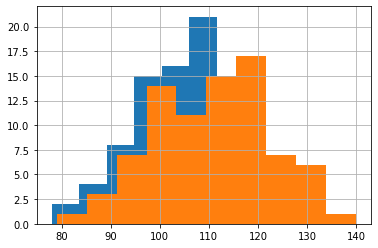

In [15]:
bosdf.TeamPoints.hist()
cldf.TeamPoints.hist()


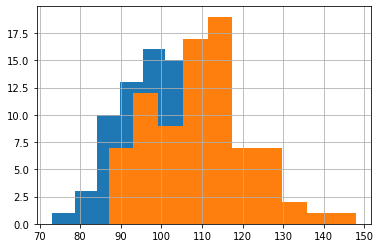

In [16]:
bosdf.OpponentPoints.hist()
cldf.OpponentPoints.hist()


In [17]:
bosmeanpts = bosdf.TeamPoints.mean()
clmeanpts = cldf.TeamPoints.mean()
bosdpts = bosdf.TeamPoints.std()
clsdpts = cldf.TeamPoints.std()

bosmeanopp = bosdf.OpponentPoints.mean()
clmeanopp = cldf.OpponentPoints.mean()
bossdopp = bosdf.OpponentPoints.std()
clsdopp = cldf.OpponentPoints.std()

print("Boston Points Mean ", bosmeanpts)
print("Boston Points SD ", bosdpts)
print("Cleveland Points Mean ", clmeanpts)
print("Cleveland Points SD ", clsdpts)

print("Boston OppPoints Mean ", bosmeanopp)
print("Boston OppPoints SD ", bossdopp)
print("Cleveland OppPoints Mean ", clmeanopp)
print("Cleveland OppPoints SD ", clsdopp)


Boston Points Mean  104.01219512195122
Boston Points SD  10.400016503357067
Cleveland Points Mean  110.85365853658537
Cleveland Points SD  12.02068377014038
Boston OppPoints Mean  100.42682926829268
Boston OppPoints SD  10.670173599204348
Cleveland OppPoints Mean  109.92682926829268
Cleveland OppPoints SD  12.05213006920597


In [21]:
def gameSim():
    BOSScore = (rnd.gauss(bosmeanpts,bosdpts)+ rnd.gauss(clmeanopp,clsdopp))/2
    CLScore = (rnd.gauss(clmeanpts,clsdpts)+ rnd.gauss(bosmeanopp,bossdopp))/2
    if int(round(BOSScore)) > int(round(CLScore)):
        return 1
    elif int(round(BOSScore)) < int(round(CLScore)):
        return -1
    else: return 0


In [29]:
def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    percentage_bos = "{:.0%}".format(team1win/(team1win+team2win+tie))
    print('BOS Win ', percentage_bos)
    percentage_cle = "{:.0%}".format(team2win/(team1win+team2win+tie))
    print('CLE Win ', percentage_cle)
    indecisive_percent = "{:.0%}".format(tie/(team1win+team2win+tie))
    print('Indecisive ', indecisive_percent)
    return gamesout


In [30]:
gamesSim(10000)

BOS Win  54%
CLE Win  43%
Indecisive  3%


[1,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 